# Data augmentation

In [1]:
import os
import torch
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import v2
from torchvision.transforms import functional as F
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import imageio.v3 as iio
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image


/nix/store/2cf7wk0c4w30cing9xa892dbp4iyjgx7-python3-3.11.8-env/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/nix/store/2cf7wk0c4w30cing9xa892dbp4iyjgx7-python3-3.11.8-env/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may

In [2]:
def rotate_img(img):
    im_rotated = np.rot90(img)
    for i in range(2):
        im_rotated = np.rot90(im_rotated)
    return im_rotated

def apply_plt_settings():
    plt.axis('off')
    plt.gcf().set_frameon(False) #remove white padding

def display_img_im(img):
    #img = rotate_img(img)

    plt.imshow(img)
    apply_plt_settings()
    plt.show()

def display_img(filepath):
    im = iio.imread(filepath)
    display_img_im(im)


In [10]:

dataset_root = '/home/pinkvinus/Documents/itu/AML/AML-exam-project/project/mvtec_anomaly_detection'  # Replace with the correct path
carpet_path = dataset_root + '/carpet/train/'

datafolder = ImageFolder(root=carpet_path)
dataloader = DataLoader(datafolder, batch_size=218, collate_fn=lambda x: tuple(zip(*x)), shuffle=True)
H, W = 1024, 1024

iter_loader = iter(dataloader)

for batch in iter_loader:
    raw_images, labels = batch  # `raw_images` are still PIL Images
    break

transforms = v2.Compose([
    v2.RandomRotation(degrees=(88,92)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomResizedCrop(size=(512, 512), antialias=True),
])

counter = 219

savepath = "/home/pinkvinus/Documents/itu/AML/AML-exam-project/project/augmented_images/"



for i in raw_images:
    for j in range(0,6):
        tensor = F.pil_to_tensor(i)
        tensor = tensor.to(torch.float32) / 255.0
        new_img = transforms(tensor)
        print(f"tensor:{new_img.size()}, ")
        to_pil = ToPILImage()
        image = to_pil(new_img)
        print(f"image: {image.size}")
        image.save(savepath + str(counter) + ".png")
        counter = counter + 1

tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512

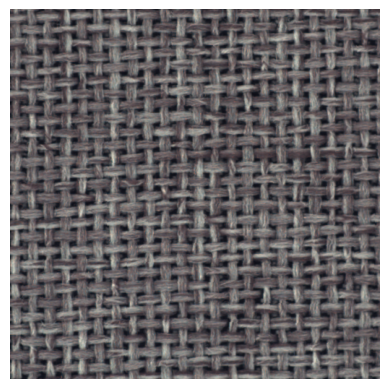

tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)
tensor:torch.Size([3, 512, 512]), 
image: (512, 512)


In [6]:

dataset_root = '/home/pinkvinus/Documents/itu/AML/AML-exam-project/project/mvtec_anomaly_detection'  # Replace with the correct path
carpet_path = dataset_root + '/carpet/train/'

datafolder = ImageFolder(root=carpet_path)
dataloader = DataLoader(datafolder, batch_size=218, collate_fn=lambda x: tuple(zip(*x)), shuffle=False)
H, W = 1024, 1024

iter_loader = iter(dataloader)

for batch in iter_loader:
    raw_images, labels = batch  # `raw_images` are still PIL Images
    break

transforms = v2.Compose([
    v2.RandomRotation(degrees=(88,92)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomResizedCrop(size=(512, 512), antialias=True),
])

counter = 219

savepath = "/home/pinkvinus/Documents/itu/AML/AML-exam-project/project/augmented_images/"


i = raw_images[0]

display_img_im(i)

for j in range(0,11):
    tensor = F.pil_to_tensor(i)
    tensor = tensor.to(torch.float32) / 255.0
    new_img = transforms(tensor)
    print(f"tensor:{new_img.size()}, ")
    to_pil = ToPILImage()
    image = to_pil(new_img)
    print(f"image: {image.size}")
    image.save(savepath + str(counter) + ".png")
    counter = counter + 1